In [3]:
import pandas as pd
import numpy as np
import urllib
import requests
import re
import seaborn as sns
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
#from googlesearch import search
from urllib.error import HTTPError
import socket

In [4]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Sentiment_SNP')

import helper_functions
from helper_functions import *

In [5]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [6]:
url = "https://finviz.com/news.ashx"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)
#requests.get(url, headers=headers,verify=False)

try:
    #urllib.request.urlretrieve(url)
    contents = urlopen(req).read() 
    #contents = urlopen(url).read()
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)
        #search_keywords=['patient access','patient reached','patients reached','patients treated','reimbursement','reimbursed','coverage', 'access performance', 'access rate', 'covered']

        # for sentence in sentences:
        #     for word in search_keywords:
        #         if word in sentence:
        #             url2.append(url)
        #             word2.append(word)
        #             sentence2.append(sentence)

        #print(sentence)


except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")


# df = pd.DataFrame({'url': url2, 'keyword': word2, 'context':sentence2})
# df.to_csv('johnson.csv', index=False, encoding='utf-8')

In [7]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [9]:
df = pd.DataFrame(sentence2)

In [27]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

KeyError: 0

In [11]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [12]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


0
20
40
60
80
100
120
140
160
180
200


In [22]:
df2 = df[df['word_count'] > 10]
df2['Headline_Lower'] = df2['Headline'].str.lower()
df2

,Headline,Sentiment,word_count,Score,Headline_Lower
17,Larry Kudlow: Former Israel Prime Minister Ben...,POSITIVE,14,0.994342,larry kudlow: former israel prime minister ben...
21,US judge dismisses lawsuit against Saudi crown...,NEGATIVE,11,0.984495,us judge dismisses lawsuit against saudi crown...
22,Swedbank sees income growth outpacing costs as...,POSITIVE,12,0.930149,swedbank sees income growth outpacing costs as...
23,Stocks making the biggest moves after hours: M...,POSITIVE,15,0.937492,stocks making the biggest moves after hours: m...
25,"Madison Square Garden changes spinoff plans, f...",POSITIVE,11,0.984254,"madison square garden changes spinoff plans, f..."
...,...,...,...,...,...
184,Lewis Johnson of Capital Wealth Advisors on De...,POSITIVE,15,0.995001,lewis johnson of capital wealth advisors on de...
187,A quiet close to Friday's trading but Dow Jone...,POSITIVE,12,0.961830,a quiet close to friday's trading but dow jone...
192,Trading Psychology Advice - 2: Pursue Your De...,POSITIVE,12,0.995112,trading psychology advice - 2: pursue your de...
193,Trading Psychology Advice - 1: Get the Right ...,NEGATIVE,12,0.754755,trading psychology advice - 1: get the right ...


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

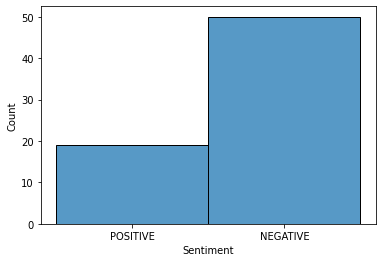

In [18]:
sns.histplot(x = 'Sentiment', data = df2[df2['Score'] > 0.8])

In [20]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [25]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [26]:

## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df2["Headline_Lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

